In [19]:
import json
from pprint import pprint
import matplotlib.pyplot as plt
import os, glob
plt.style.use('ggplot')

In [77]:
exp_names = {
    'exp_3': 'HalfCheetah-v2',
    'exp_4': 'Walker2d-v2',
    'exp_5': 'Hopper-v2' 
}

def showViz(filepath, exp):
    data_PPO = json.load(open(filepath))
    plt.plot(data_PPO['episode_rewards'])
    agent_name = filepath.split('/')[2]
    plt.title('{} : {}'.format(agent_name, exp_names[exp]))
    plt.show()
    
def compareExp(exp):
    filepath_PPO = glob.glob(os.path.join('../logs/PPO/', exp) + '/*episode*')[0]
    filepath_TRPO = glob.glob(os.path.join('../logs/TRPO/', exp) + '/*episode*')[0]
    filepath_VPG = glob.glob(os.path.join('../logs/VPG/', exp) + '/*episode*')[0]
    
    showViz(filepath_PPO, exp)
    showViz(filepath_TRPO, exp)
    showViz(filepath_VPG, exp)
    
def compareAll():
    lgpath = '../logs/'
    agent_names = ['PPO', 'TRPO', 'VPG']
    exp_names = {
        'exp_3': 'HalfCheetah-v2',
        'exp_4': 'Walker2d-v2',
        'exp_5': 'Hopper-v2' 
    }
    
    fig, ax = plt.subplots(nrows=3, ncols=3, squeeze=False, figsize=(20,20))
    
    for row, agent in zip(ax, agent_names):
        for idx, exp in enumerate(exp_names):
            # get the row, each row will have the same agent but different envs
            filepath = glob.glob(os.path.join(lgpath, agent, exp) + '/*episode*')[0]
            data = json.load(open(filepath))
            row[idx].plot(data['episode_rewards'])
            row[idx].set_title('{} : {}'.format(agent, exp_names[exp]))
            row[idx].set_xlabel('Episodes')
            row[idx].set_ylabel('Reward')
            
    plt.savefig('./comparison.png')
    plt.show()

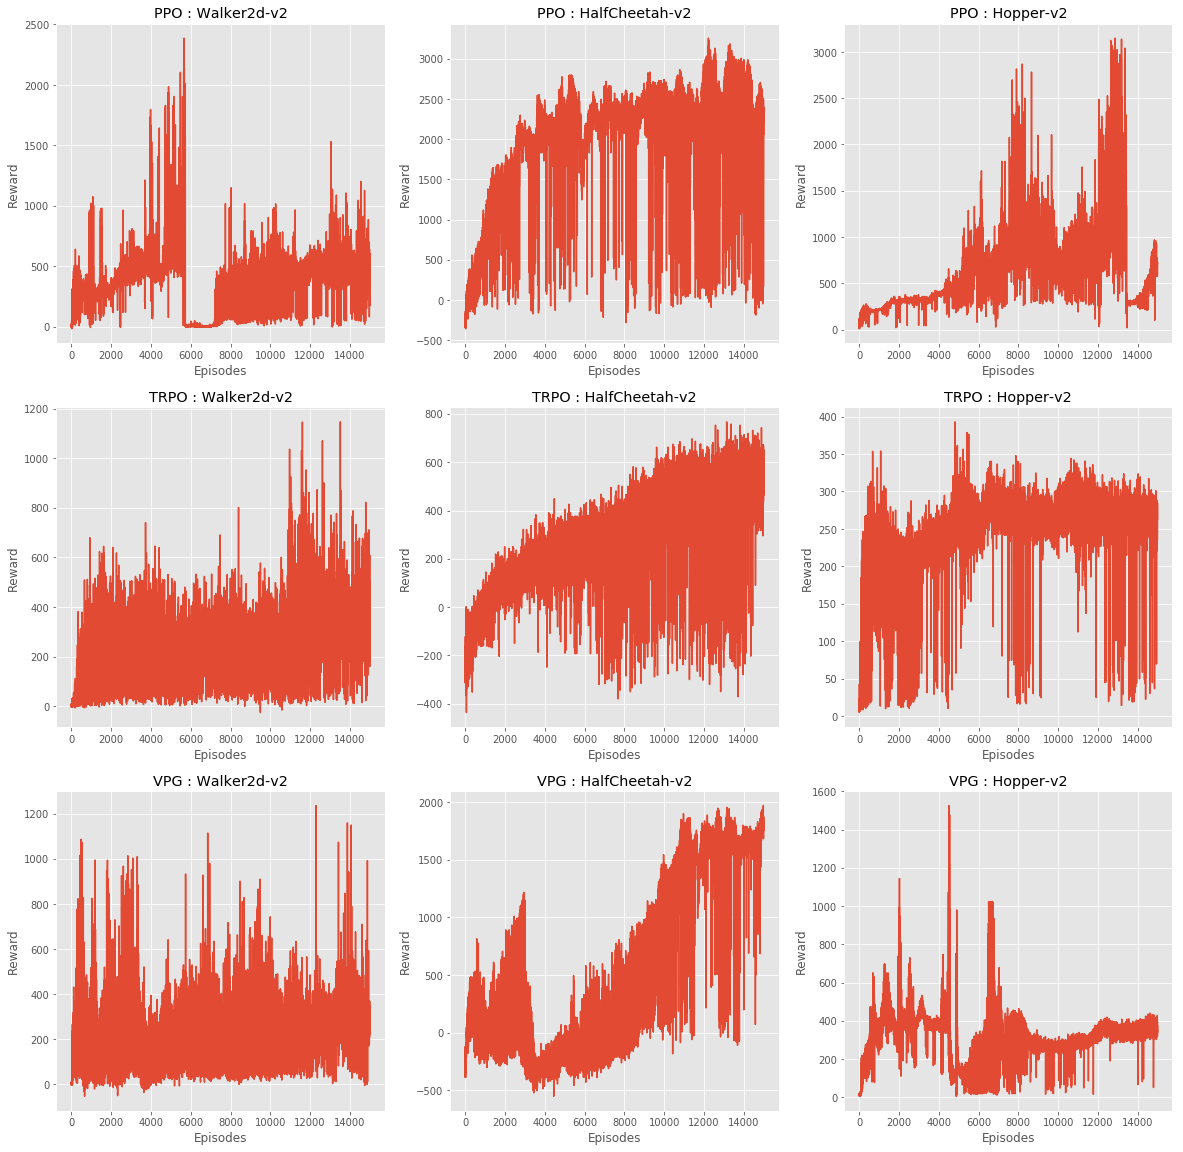

In [78]:
compareAll()